In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import importlib
import scripts.theodolite_function as tfu
import scipy.optimize as opti
import itertools
import scripts.liblie as ll
import scripts.resection_functions as rf

In [28]:
rf = importlib.reload(rf)

file_name = './data/total_station/20220711/theodolite_reference_prisms_geomatic.txt'
pilier_A = np.array([0, 0, 0, 1]).T
pilier_B = np.array([0, np.sqrt(181.016**2 - 0.323**2), 0.323, 1])
pilier_C = np.array([0, np.sqrt(363.492**2 - 1.038**2), 1.038, 1])
pilier_D = np.array([0, np.sqrt(548.578**2 - 2.374**2), 2.374, 1])
pilier_ref = np.array([pilier_A, pilier_B, pilier_C, pilier_D]).T


TW1,TW2,TW3,cp_1_all,cp_2_all,cp_3_all,error_all,errors1, errors2, errors3 = rf.geomatic_resection_optimization_on_pose(file_name, pilier_ref)

<IPython.core.display.Javascript object>


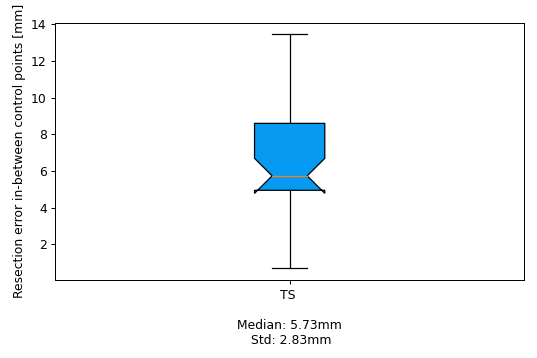

In [39]:
fig = plt.figure(figsize =(6, 4))
ax = fig.add_subplot(111)

box = ax.boxplot(error_all, notch=True, patch_artist=True, vert = 1, showfliers=False, showmeans=False)
plt.xticks([1], ["TS \n\n Median: "+str(round(np.median(error_all),2))+"mm \n Std: "+str(round(np.std(error_all),2))+"mm"])
colors_box = ['#069AF3']

for patch, color in zip(box['boxes'], colors_box):
    patch.set_facecolor(color)
        
ax.set_ylabel("Resection error in-between control points [mm]")
fig.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


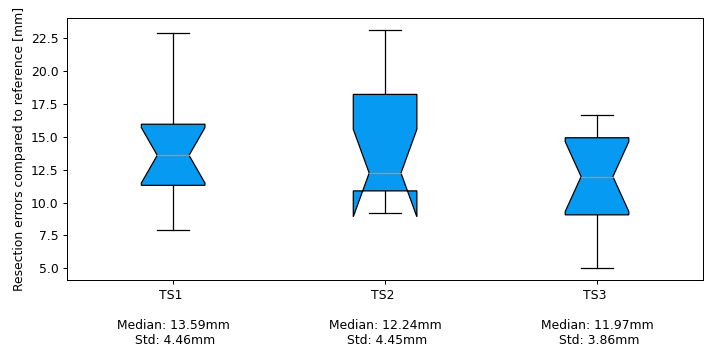

In [35]:
fig = plt.figure(figsize =(8, 4))
ax = fig.add_subplot(111)

box = ax.boxplot([errors1, errors2, errors3], notch=True, patch_artist=True, vert = 1, showfliers=False, showmeans=False)
plt.xticks([1, 2, 3], ["TS1 \n\n Median: "+str(round(np.median(errors1),2))+"mm \n Std: "+str(round(np.std(errors1),2))+"mm",
                       "TS2 \n\n Median: "+str(round(np.median(errors2),2))+"mm \n Std: "+str(round(np.std(errors2),2))+"mm",
                       "TS3 \n\n Median: "+str(round(np.median(errors3),2))+"mm \n Std: "+str(round(np.std(errors3),2))+"mm"])
colors_box = ['#069AF3', '#069AF3', '#069AF3']

for patch, color in zip(box['boxes'], colors_box):
    patch.set_facecolor(color)
        
ax.set_ylabel("Resection errors compared to reference [mm]")
fig.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


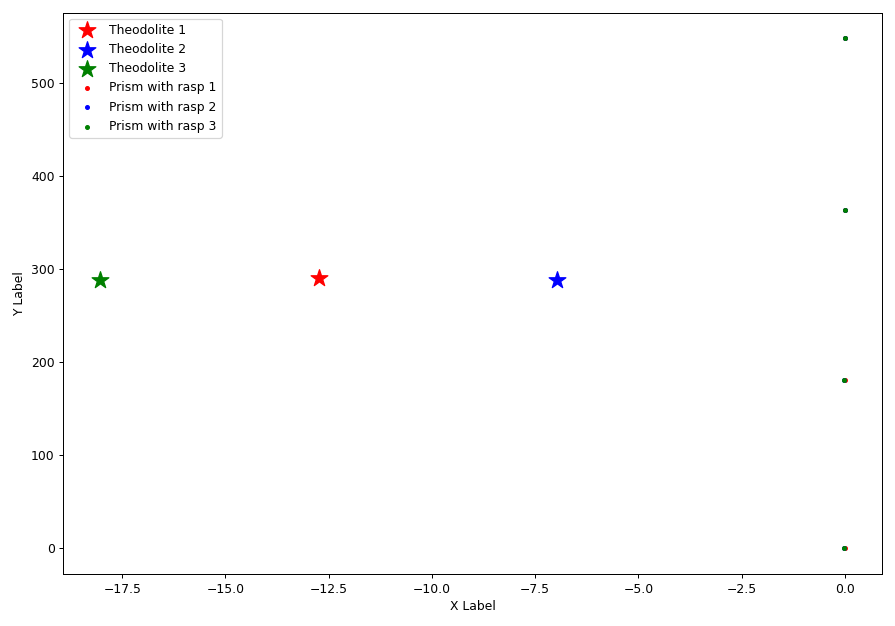

In [40]:
%matplotlib notebook
tfu.plot_trajectories_prism(3, cp_1_all, cp_2_all, cp_3_all, TW1, TW2, TW3, 0, 0,"example.pdf",0)
fig.tight_layout()